# Linear Regression

![Mad men](assets/linear-regression/Ratings-for-Mad-Men.png)

(image: [flowingdata.com](https://flowingdata.com/2014/03/24/graph-tv-shows-ratings-by-episode/))

# Topics

- Linear and polynomial equations
- Loss functions
- Gradient descent
- Evaluation metrics
- Appendix: Other Regression Models

## Where are we?

![one of many cheatsheets](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Linear Equation

From $x$ (a feature), predict $y$ (outcome or result) assuming a "linear relationship".

$$y=Wx+b$$

![linear equation](assets/linear-regression/linear-equation.png)

## Polynomial Equations

Features can also be different degrees ($m$) of $x$ ($x^m$)

![polynomial](assets/linear-regression/polynomial-equations.png)

(image: sklearn)

## Objective

Given $y = Wx+b$

Find $W$ and $b$ so that $y$ is as accurate as possible

Loss function: measures "how accurate"

## Loss Functions

Also known as cost function, objective function

Example: Mean Square Error
$$L(W, b) = MSE(W, b) = \frac{1}{N}\sum_{i=1}^N{\big(y_i - (Wx_i + b)\big)^2}$$

Many more examples: http://scikit-learn.org/stable/modules/model_evaluation.html

## Objective (of Training)

Find $W^*$ and $b^*$ to minimize the loss function:

$$\underset{W^*, b^*}{\arg \min}\; L(W, b)$$

$$\underset{W^*, b^*}{\arg \min}\; \frac{1}{N}\sum_{i=1}^N{\big(y_i - (Wx_i + b)\big)^2}$$

$N$: number of samples

## Gradient Descent

1. Initialize parameters ($W$ and $b$) to random values
2. Compute gradient of the loss function: $L'(W, b)$
3. Update rule ($\epsilon$ = learning rate)
    $$W := W -\epsilon L'(W, b)$$
    $$b := b -\epsilon L'(W, b)$$
4. Repeat 2 and 3 until find $W^*$ and $b^*$

## Linear Equation as Dot Product

$y = Wx + b$

Let $x_0 = 1$, then:

$y = Wx + bx_0$

## Linear Equation as Dot Product

$y = Wx + bx_0 = bx_0 + Wx$

$y = \left[ \begin{array}{cc}
b & W \end{array} \right]
\left[ \begin{array}{c}
x_0 \\
x \end{array} \right] = \left[ \begin{array}{cc}
b & W \end{array} \right]
\left[ \begin{array}{c}
1 \\
x \end{array} \right] = \left[ \begin{array}{c}
b \\
W \end{array} \right]^T \left[ \begin{array}{c}
1 \\
x \end{array} \right] = \theta^TX$

where $\theta = \left[ \begin{array}{c}
b \\
W \end{array} \right]$ and $X = \left[ \begin{array}{c}
1 \\
x \end{array} \right]$

## Polynomial Equation as Dot Product

$y = W_2x^2 + W_1x + b = b+ W_1x + W_2x^2$

$y = \left[ \begin{array}{ccc}
b & W_1 & W_2 \end{array} \right]
\left[ \begin{array}{c}
1 \\
x \\
x^2 \end{array} \right] = \left[ \begin{array}{c}
b \\
W_1 \\
W_2 \end{array} \right]^T
\left[ \begin{array}{c}
1 \\
x \\
x^2\end{array} \right] = \theta^TX$

## Loss Function

For the $i^{th}$ sample: $y_i = \theta^TX_i$

Loss function computes for all N samples:
$$L(\theta) = MSE(\theta) = \frac{1}{N}\sum_{i=1}^N{\big(y_i - \theta^TX_i\big)^2}$$

## Why Dot Product?

In [ ]:
import numpy as np

# 25 features, 10000 samples
X = np.random.rand(10000, 25)
W = np.random.rand(1, 25)

y1 = np.zeros((10000, 1))

In [ ]:
%%time
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
     y1[i] = y1[i] +W[0][j]*X[i][j]

In [ ]:
%time
y2 = np.dot(X, W.T)

In [ ]:
# ensure the two operations are the same
np.testing.assert_allclose(y1, y2)

## Libraries

http://scikit-learn.org/stable/modules/linear_model.html#linear-model

- LinearRegression (Least Squares)
- PolynomialFeatures

## Evaluation Metrics

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

- Mean squared error (MSE)
- Mean squared log error (MSLE)
- Mean absolute error (MAE)
- $R^2$ score

# Appendix: Other Regression Models

Here's a quick summary of other regression models.

- Ridge Regression
- Lasso
- Elastic Net

## Recap: Linear Regression

Objective:

$$\underset{\theta} {\arg \min} \left\Vert \theta^TX - y \right\Vert^2 $$

When there are multiple features in $X$, assumes features are independent. 

If not, least squares becomes sensitive to noise. This is because the same noise can appear in related features and be magnified.

<IPython.core.display.Javascript object>


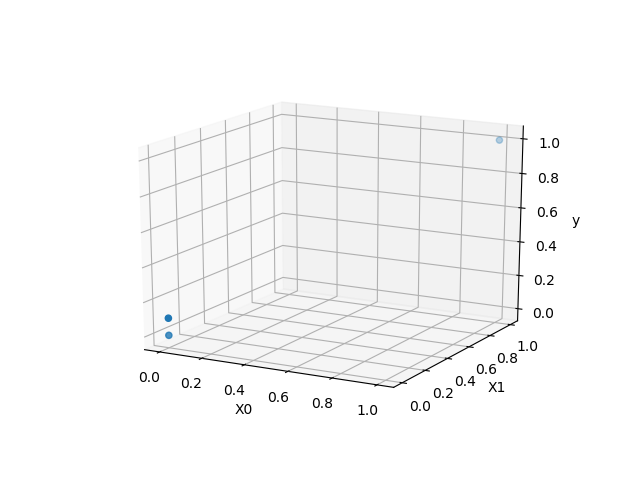

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Our fake data
X = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]

# Let's plot our fake data in 3D
# We need 3 columns: x0, x1, y
data = np.array(X)
X0 = data[:, 0]
X1 = data[:, 1]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(X0, X1, y)
ax.set(xlabel='X0', ylabel='X1', zlabel='y')
fig.show()

In [6]:
from sklearn.linear_model import LinearRegression

# Our baseline model
model = LinearRegression()

model.fit(X, y)
print('Coefficients', model.coef_, 'Intercept', model.intercept_)

X_test = [[1, 1]] # needs to be 2D array
model.predict(X_test)

Coefficients [0.475 0.475] Intercept 0.050000000000000044


array([1.])

In [46]:
def plot_model(model, X, ax, label, color):
    """Plots a model on the given axes
    Args:
        model: the model to plot
        X: the input data
        ax: the matplotlib axes
        label: the label for the plot
        color: the color of the plot
    """
    data = np.array(X)
    X0 = data[:, 0]
    X1 = data[:, 1]

    x_test = np.stack((np.linspace(min(X0), max(X0)),
                   np.linspace(min(X1), max(X1))),
                  axis=1)
    preds = model.predict(x_test)
    ax.plot(x_test[:, 0], x_test[:, 1], preds, label=label, color=color)

<IPython.core.display.Javascript object>


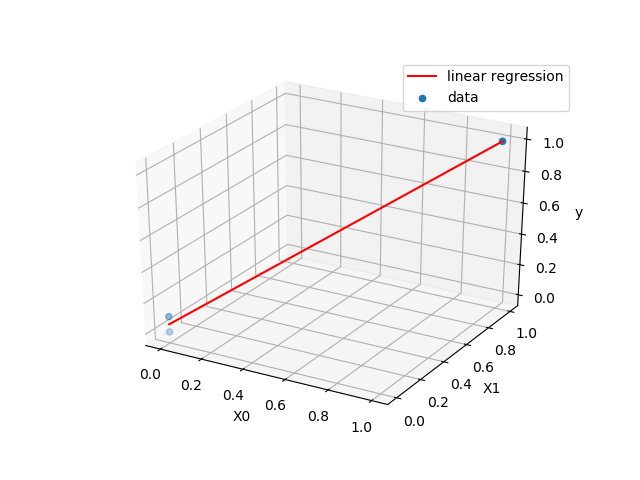

In [47]:
# Plot the model against samples
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# plot the samples
ax.scatter(X0, X1, y, label='data')

# plot the model
plot_model(model, X, ax, 'linear regression', 'red')

ax.set(xlabel='X0', ylabel='X1', zlabel='y')
ax.legend()
fig.show()

(50, 2)

## Ridge Regression

Add a penalizing factor to sum of squares.

Objective:

$$\underset{\theta} {\arg \min} \left\Vert \theta^TX - y \right\Vert^2 +  \alpha \left\Vert \theta \right\Vert^2 $$

$\alpha$ = hyperparameter. Increase this when you suspect features may have linear dependencies.

Notes:
- The equation looks similar to L2 Regularization, except L2 Regularization applies to the Loss function.
- The principle is similar to Regularization, in that we are penalizing the impact of input features

In [51]:
# http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
from sklearn.linear_model import Ridge

alpha = .5
ridge = Ridge(alpha=alpha)

ridge.fit(X, y)
print('Coefficients', ridge.coef_, 'Intercept', ridge.intercept_)

X_test = [[1, 1]] # needs to be 2D array
ridge.predict(X_test)

Coefficients [0.34545455 0.34545455] Intercept 0.1363636363636364


array([0.82727273])

<IPython.core.display.Javascript object>


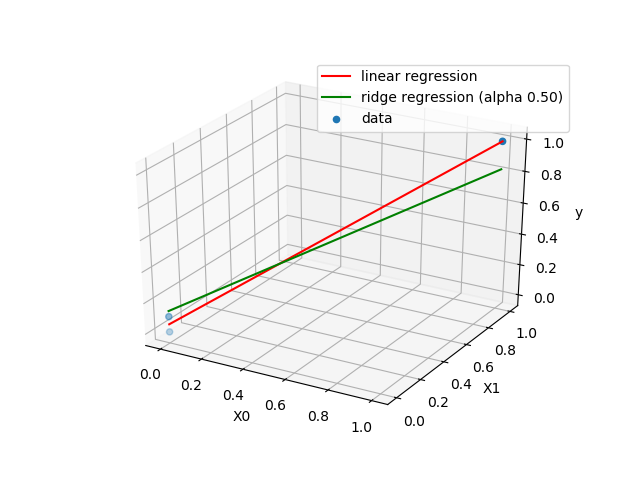

In [53]:
# Plot the models against samples
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# plot the samples
ax.scatter(X0, X1, y, label='data')

# plot the models
plot_model(model, X, ax, 'linear regression', 'red')
plot_model(ridge, X, ax, 'ridge regression (alpha %.2f)' % alpha, 'green')

ax.set(xlabel='X0', ylabel='X1', zlabel='y')
ax.legend()
fig.show()

In [13]:
# Same as above, but using hyper parameter search
# on a selection of alpha values
from sklearn.linear_model import RidgeCV

alphas = [1e3, 1e2, 0.1, 1.0, 10]

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X, y)

print('Coefficients', ridge_cv.coef_, 'Intercept', ridge_cv.intercept_, 'Best alpha', ridge_cv.alpha_)

X_test = [[1, 1]] # needs to be 2D array
ridge_cv.predict(X_test)

Coefficients [0.44186047 0.44186047] Intercept 0.07209302325581218 Best alpha 0.1


array([0.95581395])

<IPython.core.display.Javascript object>


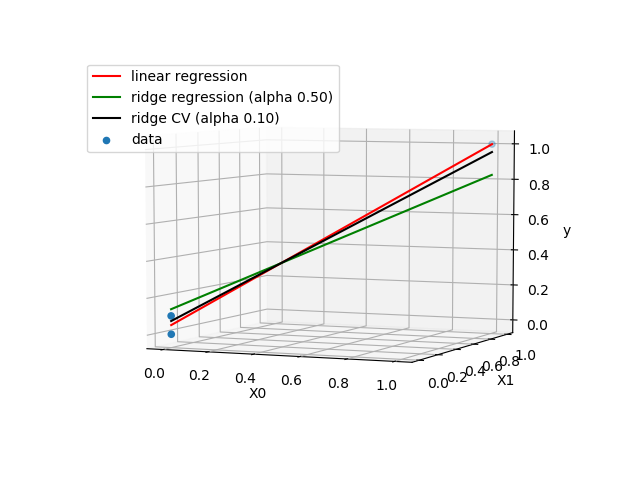

In [54]:
# Plot the models against samples
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# plot the samples
ax.scatter(X0, X1, y, label='data')

# plot the models
plot_model(model, X, ax, 'linear regression', 'red')
plot_model(ridge, X, ax, 'ridge regression (alpha %.2f)' % alpha, 'green')
plot_model(ridge_cv, X, ax, 'ridge CV (alpha %.2f)' % ridge_cv.alpha_, 'black')

ax.set(xlabel='X0', ylabel='X1', zlabel='y')
ax.legend()
fig.show()

## Lasso Regression

Add a penalizing factor to sum of squares.

Objective:

$$\underset{\theta} {\arg \min} \left\Vert \theta^TX - y \right\Vert^2 +  \alpha \left\Vert \theta \right\Vert^2 $$

$\alpha$ = hyperparameter. Increase this when you suspect features may have linear dependencies.
